Weights:
[[-6.07841958e+02]
 [ 5.20626109e-02]
 [ 3.81892133e+01]
 [ 4.80659468e+01]
 [ 2.40045680e+00]
 [ 1.89116785e+01]
 [-2.21694677e+00]]
MSE:
108.10222362634666


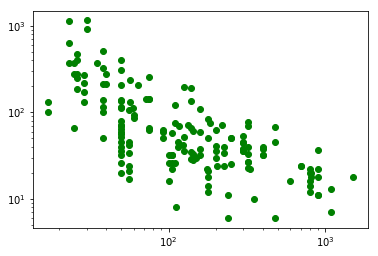

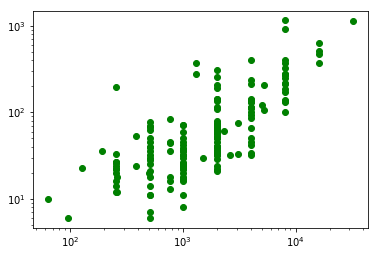

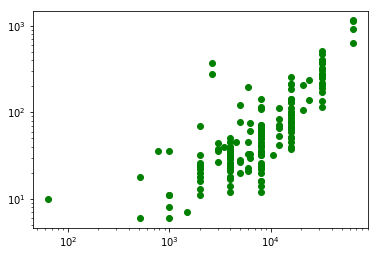

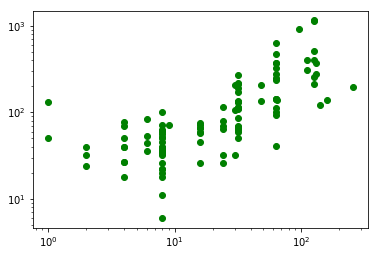

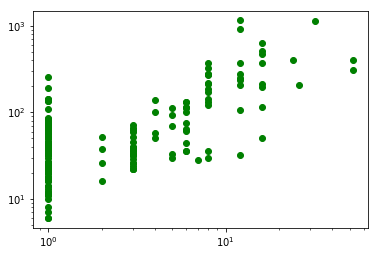

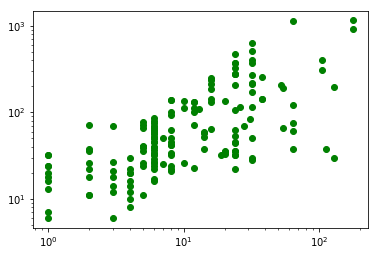

In [68]:
from IPython.display import IFrame
import pylab as plt
%matplotlib inline
import numpy as np
#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;

# Load data
X_train = np.loadtxt("X_train.csv", delimiter=',', dtype="int", skiprows=1)
y_train = np.loadtxt("y_train.csv", delimiter=',', dtype="int", skiprows=1)

# X_train
# -------
# MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
# 125,256,6000,256,16,128
# 29,8000,32000,32,8,32
# ...

# Y_train
# -------
# Id,PRP
# 0,198
# 1,269
# ...

MYCT = X_train[:,0][:,None]
MMIN = X_train[:,1][:,None]
MMAX = X_train[:,2][:,None]
CACH = X_train[:,3][:,None]
CHMIN = X_train[:,4][:,None]
CHMAX = X_train[:,5][:,None]
PRP = y_train[:,1][:,None]

# Model
X = np.hstack((
    np.ones_like(MYCT),
    np.log(MYCT),
    np.log(MMIN),
    np.log(MMAX),
    np.log(CACH+0.0001),
    np.log(CHMIN+0.0001),
    np.log(CHMAX+0.0001)
))  

# Get weights
XX = np.dot(X.T, X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T, PRP)
w = np.dot(invXX, Xt)
print("Weights:")
print(w)

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(MYCT, PRP, 'go')

# Plot prediction on MYCT
"""testx = np.linspace(10,1000,100)[:,None]
testX = np.hstack((np.ones_like(testx), testx))
testt = np.dot(testX,w)
#plt.figure()
plt.plot(testx, testt, 'bo')"""

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(MMIN, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(MMAX, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(CACH, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(CHMIN, PRP, 'go')

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(CHMAX, PRP, 'go')

mse = np.sqrt(np.sum((y-PRP)**2)/len(X_train))
print("MSE:")
print(mse)